 ### Load the drive containing data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Defining function to group less represented parties under the 'Others' category

In [3]:
def creating_category_others(data):
  # Using 0.99 quantile to categorize 'Others'
  threshold_value = data['count'].quantile(0.99)
  values_below_thresh = data['count'] < threshold_value
  data.loc[values_below_thresh,'Label'] = 'Others'
  return data

## Loading datasets

In [4]:
# Load dataset containing sport quotes
dataset = pd.read_csv('/content/drive/MyDrive/ADA/ada-sports-quotes/sport-quotes-2015.csv.bz2', compression='bz2', usecols=['speaker','qids','quoteID'])

# Load speaker attributes from Google Drive
speaker_attributes = pd.read_parquet('/content/drive/MyDrive/ADA/Project datasets/speaker_attributes.parquet', columns=['nationality','party','id'])

# Load the database relating qids with wikidata labels
qid_labels = pd.read_csv('/content/drive/MyDrive/ADA/Project datasets/wikidata_labels_descriptions_quotebank.csv.bz2', compression='bz2', index_col='QID')

In [5]:
# Removing square brackets and quotation marks from qids to match the speaker_attributes dataset
dataset['qids'] = dataset['qids'].str.strip('[\'\']')
speakers = speaker_attributes[speaker_attributes['id'].isin(dataset['qids'])]

# Removing speakers without any known party (i.e. with 'party' == None)
politicians = speakers[~(speakers['party'].isna())]

## Computing the number of speakers per party from sport quotes

Only keeping the first qid for the 'party' feature. It is known, that it is not correct because we should select the party in which the speaker was at the time of the quote. This will be solved for Milestone 3, as this requires new speaker_features dataset to obtain this information. 

In [6]:
# Only keeping the first qid in the 'party' feature (with str.get(0))
# Counts the occurences of each party and adding the corresponding party label by merging qid_labels
party_speaker_counts_label = pd.DataFrame(pd.value_counts(politicians['party'].str.get(0))).merge(qid_labels, left_index=True, right_on='QID').rename(columns={'party': 'count'})

# Setting label of party with count lower than the 0.99 quantile to 'Others'
party_speaker_counts_label = creating_category_others(party_speaker_counts_label)

## Computing the number of quotes per party from sport quotes

In [7]:
# Selecting quotes from a speaker with a party and merging the speaker_attributes dataset
dataset_politicians_attributes = dataset[dataset['qids'].isin(politicians['id'])].merge(speaker_attributes, left_on='qids', right_on='id')
# Only keeping the first qid in the 'party' feature (with str.get(0))
dataset_politicians_attributes['party'] = dataset_politicians_attributes['party'].str.get(0)

# Counts the occurences of each party and add the corresponding party label 
party_quotes_counts_label = pd.DataFrame(pd.value_counts(dataset_politicians_attributes['party'])).merge(qid_labels, left_index=True, right_on='QID').rename(columns={'party': 'count'})

# Setting label of party with count lower than the 0.99 quantile to 'Others'
party_quotes_counts_label = creating_category_others(party_quotes_counts_label)

## Plots : pie plots and bar plots

Speaker's party distribution

Text(0.6, 0.92, "Speaker's party distribution of sport quotes for year 2015")

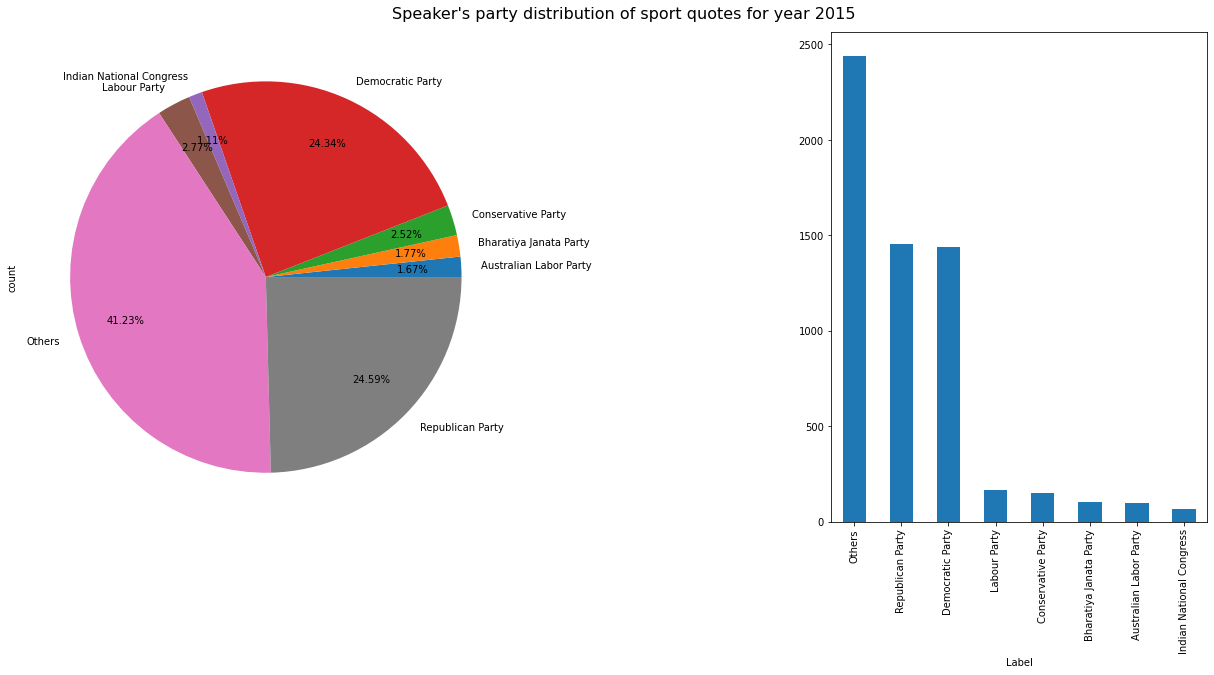

In [8]:
fig, axes = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(27,9))

party_speaker_counts_label.groupby('Label').sum().plot(kind='pie', subplots=True, legend=False, autopct='%1.2f%%', ax=axes[0], pctdistance=0.75)
party_speaker_counts_label.groupby('Label').sum().sort_values(by='count', ascending=False).plot(kind='bar',legend=False, log=False, ax=axes[1])

plt.subplots_adjust(wspace=0)
fig.suptitle('Speaker\'s party distribution of sport quotes for year 2015', fontsize=16, x=0.6, y=0.92)

Quote's party distribution

Text(0.6, 0.92, "Quote's party distribution of sport quotes for year 2015")

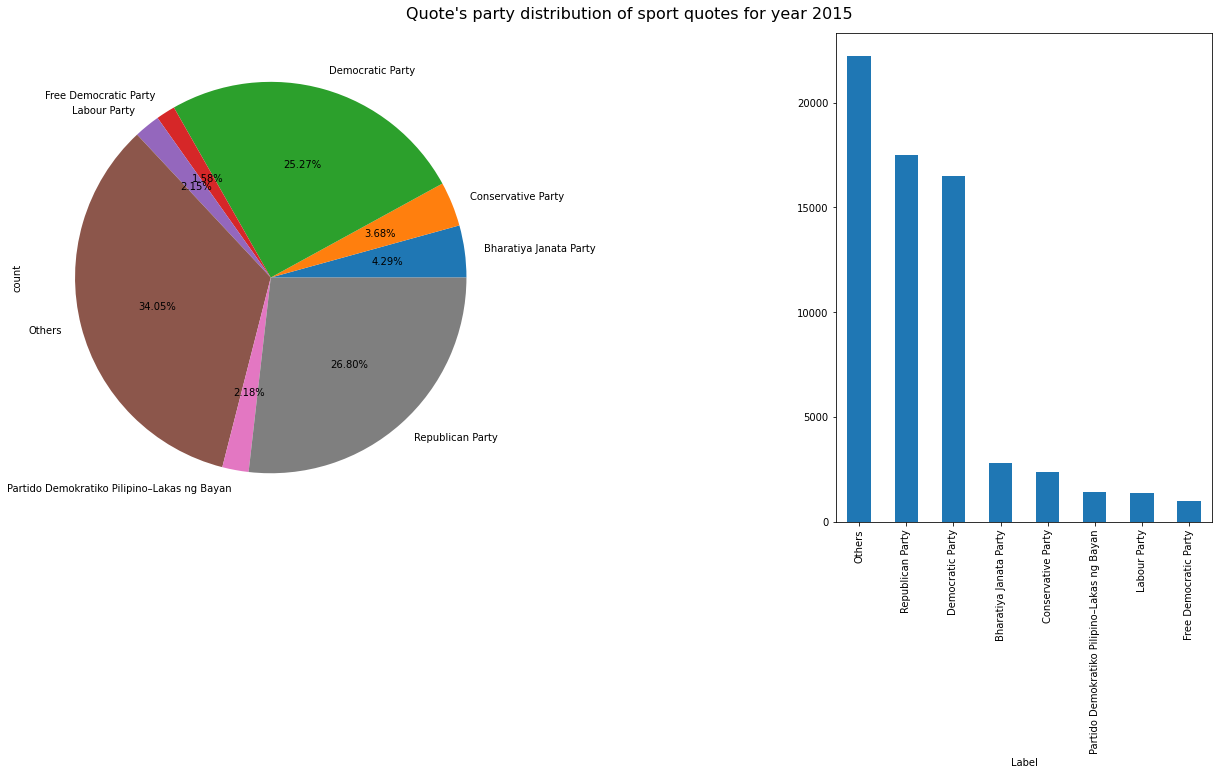

In [9]:
fig, axes = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(27,9))

party_quotes_counts_label.groupby('Label').sum().plot(kind='pie', subplots=True, legend=False, autopct='%1.2f%%', ax=axes[0])
party_quotes_counts_label.groupby('Label').sum().sort_values(by='count', ascending=False).plot(kind='bar',legend=False, log=False, ax=axes[1])

plt.subplots_adjust(wspace=0)
fig.suptitle('Quote\'s party distribution of sport quotes for year 2015', fontsize=16, x=0.6, y=0.92)

## Data description and overview

Lengths of DataFrame (i.e. number of sample)

In [10]:
print('Number of sport quotes: {q_sport}\nNumber of political quotes: {q_pol}\nNumber of speakers: {spea}\nNumber of politicians (i.e. speakers with political party): {pol}\nNumber of different parties: {part}'\
      .format(q_sport=dataset.shape[0], spea=speakers.shape[0], pol=politicians.shape[0], part=party_speaker_counts_label.shape[0], q_pol=dataset_politicians_attributes.shape[0]))

Number of sport quotes: 3296787
Number of political quotes: 65212
Number of speakers: 76390
Number of politicians (i.e. speakers with political party): 5921
Number of different parties: 698


In [11]:
dataset.sample(5)

,quoteID,speaker,qids
2189369,2015-02-26-048092,None,
2531871,2015-01-13-082586,John Elway,Q432931
782027,2015-02-03-080988,Louis Van Gaal,Q207431
2582257,2015-08-29-016811,Jeff Kelly,"Q14950724', 'Q6174224"
1330459,2015-04-12-040174,Jimmie Johnson,"Q217238', 'Q6199355"


In [12]:
speakers.sample(5)

,nationality,party,id
84878,[Q30],None,Q3042607
3411772,[Q155],None,Q363445
1324016,[Q664],None,Q7088555
4828075,[Q145],None,Q16213065
5049615,[Q408],[Q5604428],Q51163784


In [13]:
politicians.sample(5)

,nationality,party,id
8469824,[Q902],[Q1281480],Q55694385
8129559,[Q30],[Q29552],Q7793121
8009255,[Q30],[Q29468],Q2967618
139487,[Q30],[Q29468],Q5214310
3550176,[Q30],[Q29552],Q5606254


In [14]:
party_speaker_counts_label.head(5)

,count,Label,Description
QID,,,
Q29468,1456,Republican Party,major political party in the United States
Q29552,1441,Democratic Party,political party in the United States
Q9630,164,Labour Party,political party in the United Kingdom
Q9626,149,Conservative Party,political party in the United Kingdom
Q10230,105,Bharatiya Janata Party,major political party in India


In [15]:
dataset_politicians_attributes.sample(5)

,quoteID,speaker,qids,nationality,party,id
51529,2015-02-11-044042,Christiana Figueres,Q518828,[Q800],Q82591,Q518828
31616,2015-03-29-008623,Alexander Zhukov,Q57735,"[Q15180, Q159]",Q151469,Q57735
12128,2015-11-04-143633,John McCain,Q10390,[Q30],Q29468,Q10390
64019,2015-04-10-011339,Bev Perdue,Q22185,[Q30],Q29552,Q22185
58528,2015-09-22-070243,Mark Brnovich,Q18631143,[Q30],Q29468,Q18631143


In [16]:
party_quotes_counts_label.head(5)

,count,Label,Description
QID,,,
Q29468,17480,Republican Party,major political party in the United States
Q29552,16476,Democratic Party,political party in the United States
Q10230,2800,Bharatiya Janata Party,major political party in India
Q9626,2401,Conservative Party,political party in the United Kingdom
Q7140531,1420,Partido Demokratiko Pilipino–Lakas ng Bayan,political party in the Philippines
